<a href="https://colab.research.google.com/github/hopebrooke/3931/blob/main/DeePorePractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load google drive content
from google.colab import drive
drive.mount('/content/drive')


# view files in DeePore folder
%cd /content/drive/MyDrive/DeePore
!ls

import DeePore as dp
import numpy as np
import h5py
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DeePore
Data	    Demo2.py  Demo5.py	  Model3.h5    results.txt
DeePore.py  Demo3.py  images	  __pycache__  Tested_Data_Model3.mat
Demo1.py    Demo4.py  minmax.npy  README.md    VarNames.txt


In [ ]:
# dp.show_feature_maps doesn't work on this due to floats/int conversion
# redefining here with same code but added casting

def show_feature_maps(A):
    N= int(np.ceil(np.sqrt(A.shape[0])))
    f=plt.figure(figsize=(N*10,N*10))
    for I in range(A.shape[0]):
        plt.subplot(N,N,I+1)
        plt.imshow(dp.normal(np.squeeze(A[I,:,:,:])))
        plt.axis('off')
    plt.show()

    f.savefig('images/initial_feature_maps.png')


# using monkey patching to update orginal function (not advised!)
dp.show_feature_maps = show_feature_maps

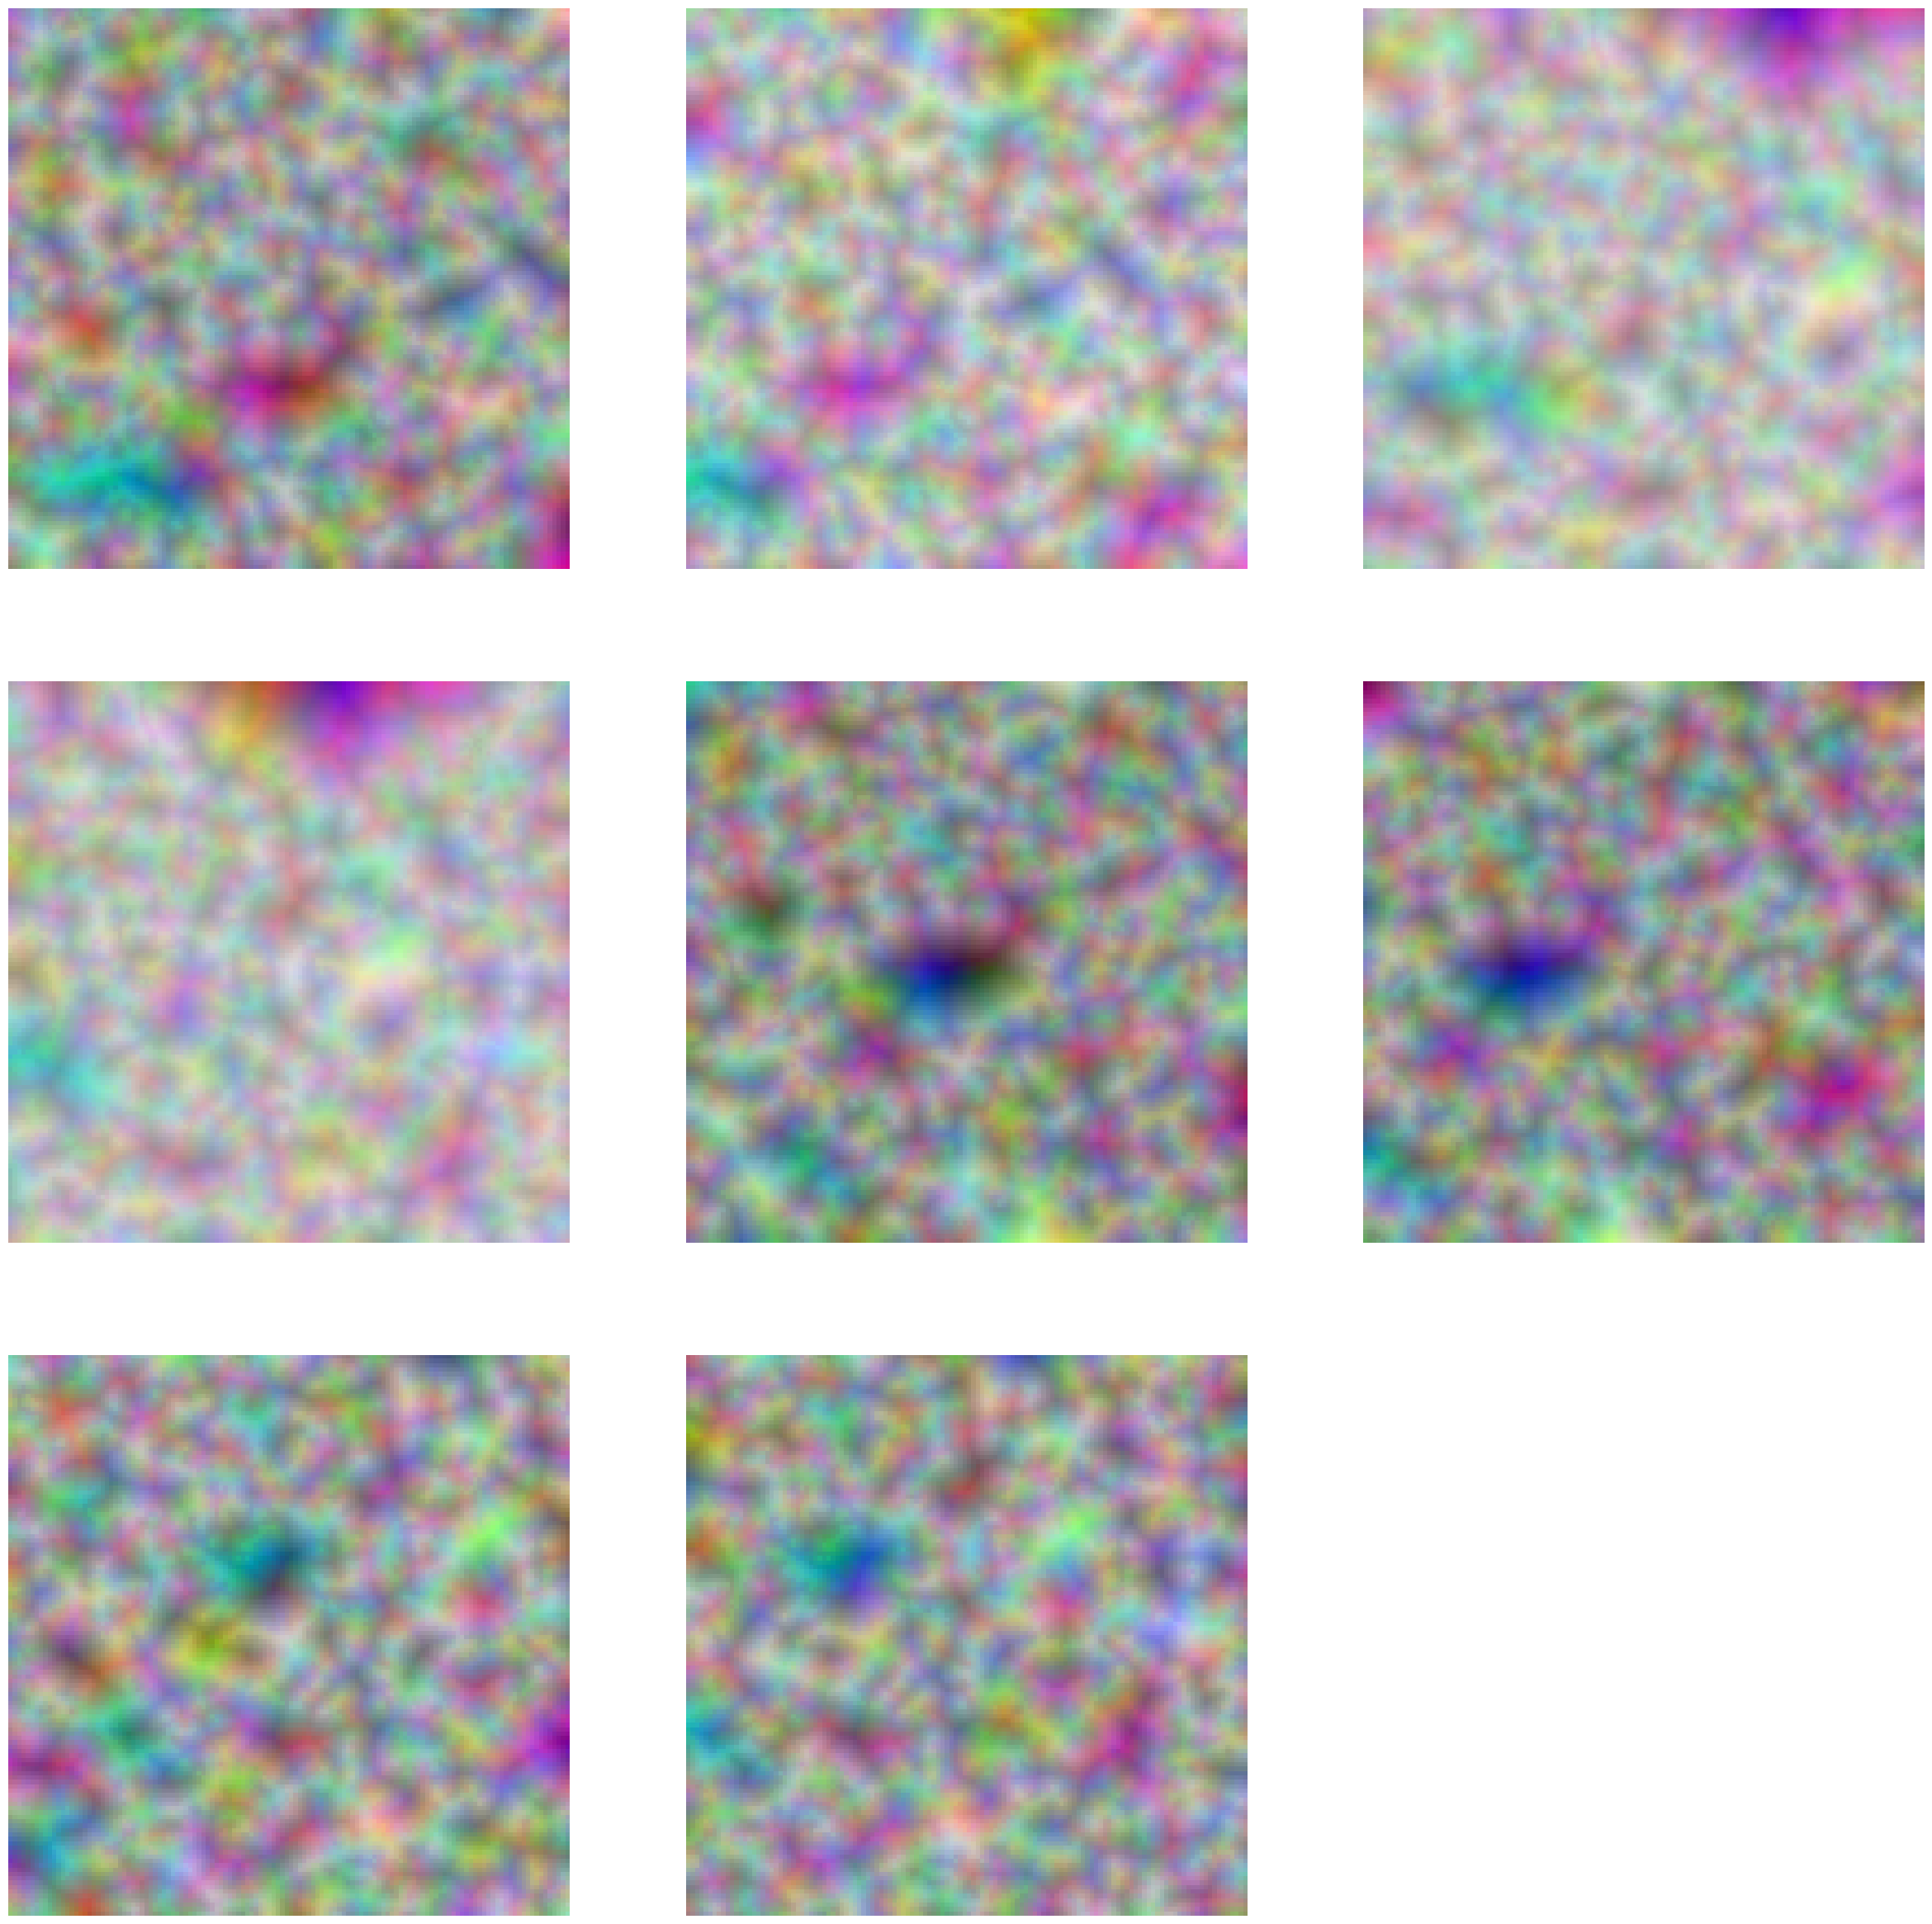

1/1 [==============================] - 1s 574ms/step


DeePore output results including 15 single-value

paramters, 4 functions and 11 distributions

__________________________________________________

        ### Single-value parameters ###

__________________________________________________



Properties                              Value

--------------------------------------------------

Absolute Permeability (um2)             1.2828238

Formation Factor (ratio)                26.9038179

Cementation Factor (ratio)              2.3059768

pore density (1/um3)                    1.6e-06

Tortuosity (ratio)                      1.4210381

Average Coordination Number             3.2719544

Average Throat Radius (um)              17.3087095

Average Pore Radius (um)                27.4299858

Average Throat Length (um)              81.1651862

Pore to Throat Aspect ratio             4.1648019

Specific Surface (1/um)                 2.1e-05

Pore Sphericity (ratio)                 2.7

In [ ]:
# CODE COPIED AND ALTERED FROM DEEPORE DEMO 1

model=dp.loadmodel()
# 2. read and transform your data into initial feature maps
# in this example, the data is a 400 x 400 x 400 binary MATLAB mat file in which 0 indicates void and 1 indicates solid space
A=dp.feedsampledata(FileName="/content/drive/MyDrive/DeePore/Data/Sample_large.mat")
# 3. show feature maps (optional)
dp.show_feature_maps(A)
# 4. predict properties
all_preds=dp.predict(model,A,res=4.8) # res is the spatial resolution of image in micron/pixel
# 5. save results into a text file and also print it in console
dp.prettyresult(all_preds,'results.txt')